## Vehicle Insurance Claim Fraud Detection - exploratory data analysis

In [1]:
# import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv("../Dataset/fraud_oracle.csv")
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
print(f'Number of observations: {len(df)}')
print(f'Number of attributes: {len(df.columns)}')
print(f'Attributes\' data types: ', *df.dtypes.unique())

Number of observations: 15420
Number of attributes: 33
Attributes' data types:  object int64


In [5]:
# new order, more comprehensible
new_order = [
 'PolicyNumber',
 'DayOfWeek',
 'WeekOfMonth',
 'Month',
 'Year',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'WeekOfMonthClaimed',
 'AccidentArea',
 'NumberOfCars',
 'Fault',
 'PoliceReportFiled',
 'WitnessPresent',
 'Sex',
 'Age',
 'AgeOfPolicyHolder',
 'MaritalStatus',
 'DriverRating',
 'Make',
 'VehicleCategory',
 'VehiclePrice',
 'AgeOfVehicle',
 'BasePolicy',
 'PolicyType',
 'RepNumber',
 'AgentType',
 'Deductible',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'PastNumberOfClaims',
 'FraudFound_P'
]
assert(set(df.columns).difference(new_order)==set())
df = df[new_order]

In [6]:
# analyze the values of 
# for attr in list(df.columns):
#     print(f'{attr}: {df[attr].unique()}')

In [7]:
df.head()
# df.to_csv('../Dataset/preprocessed_data/fraud_oracle_reordered.csv')

,PolicyNumber,DayOfWeek,WeekOfMonth,Month,Year,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,AccidentArea,NumberOfCars,...,PolicyType,RepNumber,AgentType,Deductible,Days_Policy_Accident,Days_Policy_Claim,NumberOfSuppliments,AddressChange_Claim,PastNumberOfClaims,FraudFound_P
0,1,Wednesday,5,Dec,1994,Tuesday,Jan,1,Urban,3 to 4,...,Sport - Liability,12,External,300,more than 30,more than 30,none,1 year,none,0
1,2,Wednesday,3,Jan,1994,Monday,Jan,4,Urban,1 vehicle,...,Sport - Collision,15,External,400,more than 30,more than 30,none,no change,none,0
2,3,Friday,5,Oct,1994,Thursday,Nov,2,Urban,1 vehicle,...,Sport - Collision,7,External,400,more than 30,more than 30,none,no change,1,0
3,4,Saturday,2,Jun,1994,Friday,Jul,1,Rural,1 vehicle,...,Sedan - Liability,4,External,400,more than 30,more than 30,more than 5,no change,1,0
4,5,Monday,5,Jan,1994,Tuesday,Feb,2,Urban,1 vehicle,...,Sport - Collision,3,External,400,more than 30,more than 30,none,no change,none,0


In [9]:
from pandas_profiling import ProfileReport

data_profile = ProfileReport(df=df, title="Vehicle Insurance Claim Fraud Detection", explorative=True)
data_profile

<AxesSubplot:>

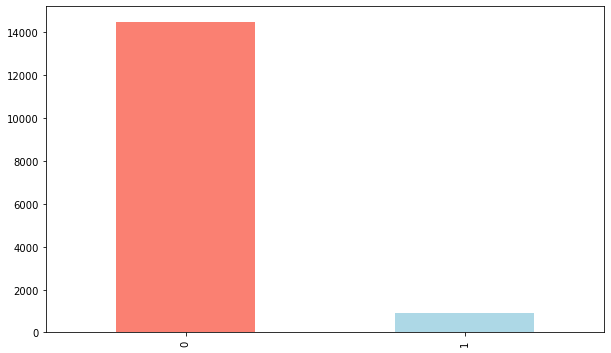

In [8]:
# some plots to be added
plt.figure(figsize=(10,6))
df["FraudFound_P"].value_counts().plot(kind="bar", color=['salmon', 'lightblue'])

In [9]:
df["FraudFound_P"].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64